🚀 STARTING COMPREHENSIVE DBSCAN & HAC EXPERIMENTAL SUITE
🔄 Loading datasets...
✅ Collision dataset: (236, 23)
✅ Injury prediction dataset: (5000, 58)
✅ Big Data Bowl dataset: (3000, 120)

🎯 ANALYZING DATASET: NFL Collision Analysis

🔍 EXPERIMENT 1: DBSCAN Parameter Optimization - NFL Collision Analysis
📏 Computing k-distance graph for eps estimation...
🔍 Grid search for optimal DBSCAN parameters...


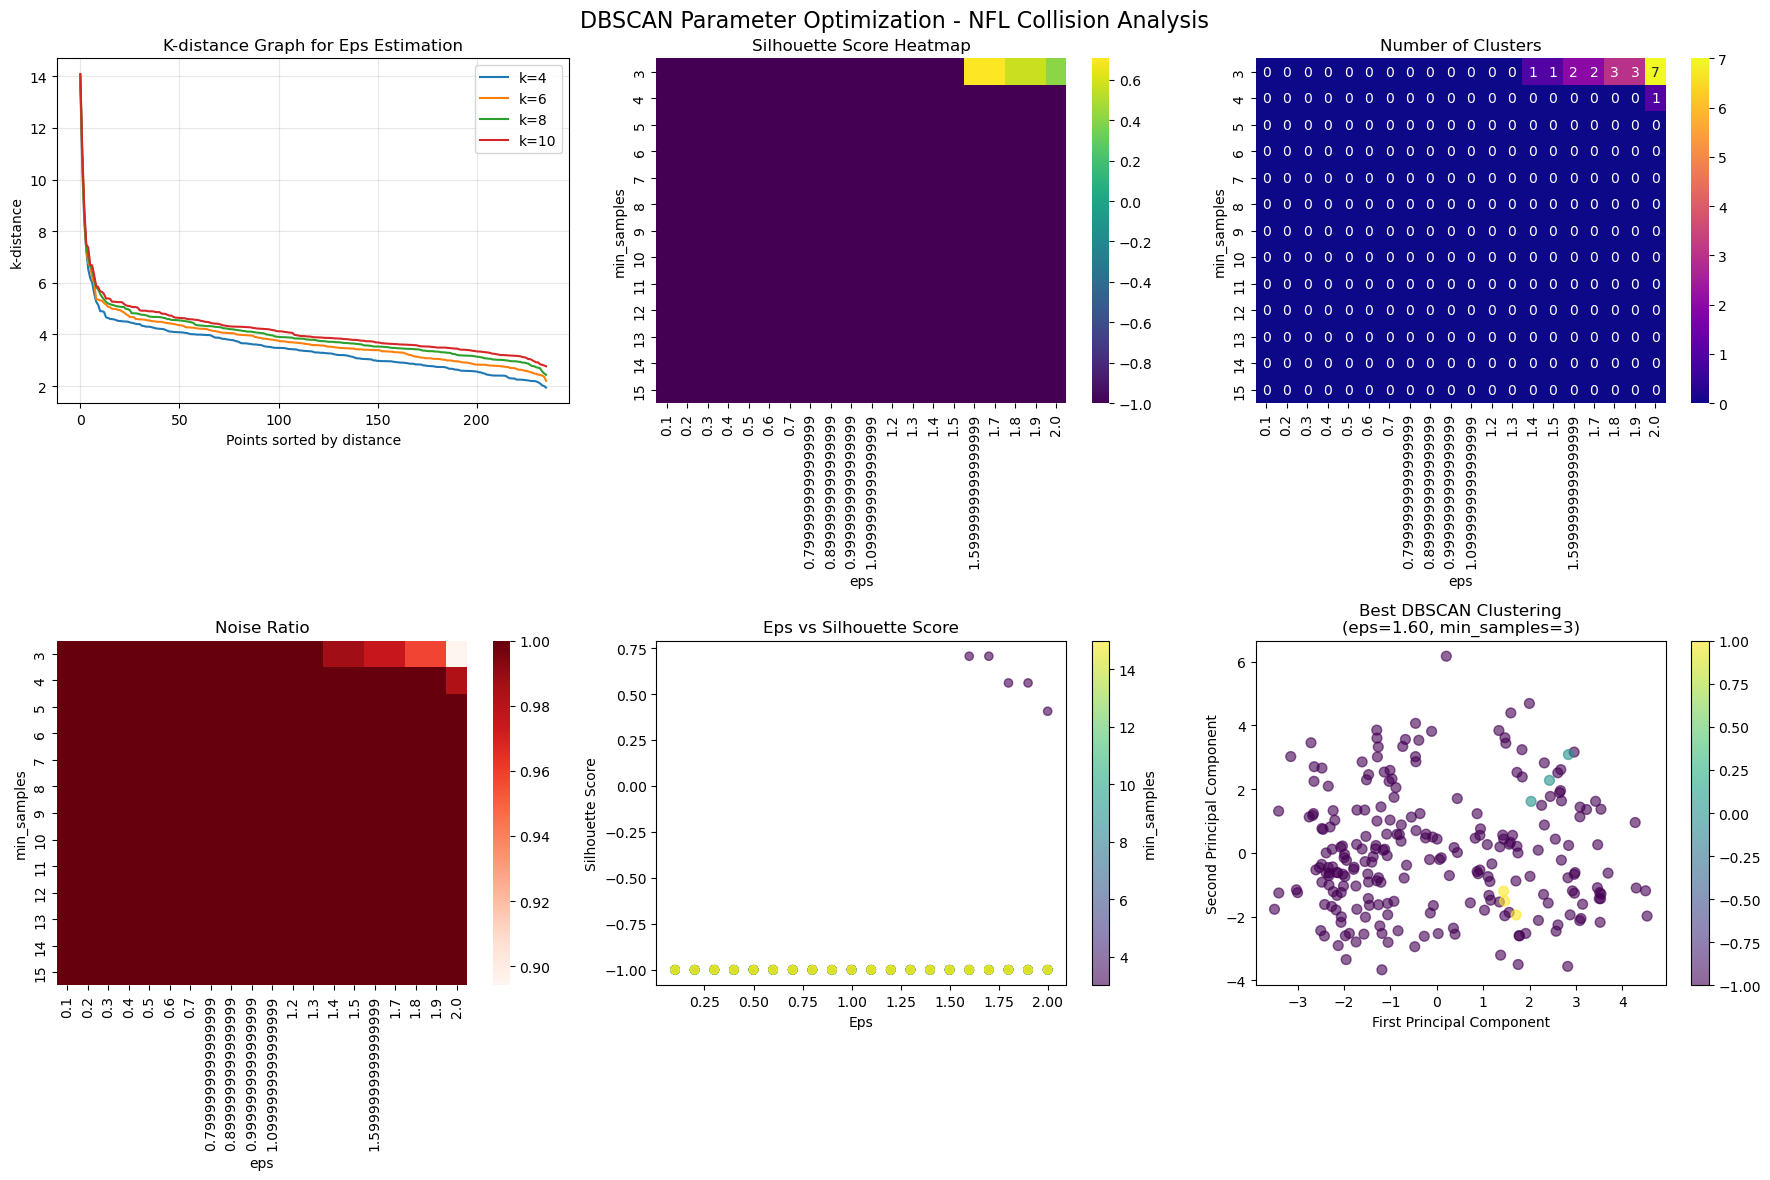

🎯 Optimal DBSCAN parameters:
   Eps: 1.600
   Min_samples: 3
   Best silhouette score: 0.706

🔍 EXPERIMENT 2: Density Analysis - NFL Collision Analysis
📊 Analyzing point densities and core points...
❌ Error in experiments for collision: Input z must be at least a (2, 2) shaped array, but has shape (0, 0)

🎯 ANALYZING DATASET: NFL Injury Prediction

🔍 EXPERIMENT 1: DBSCAN Parameter Optimization - NFL Injury Prediction
📏 Computing k-distance graph for eps estimation...
🔍 Grid search for optimal DBSCAN parameters...


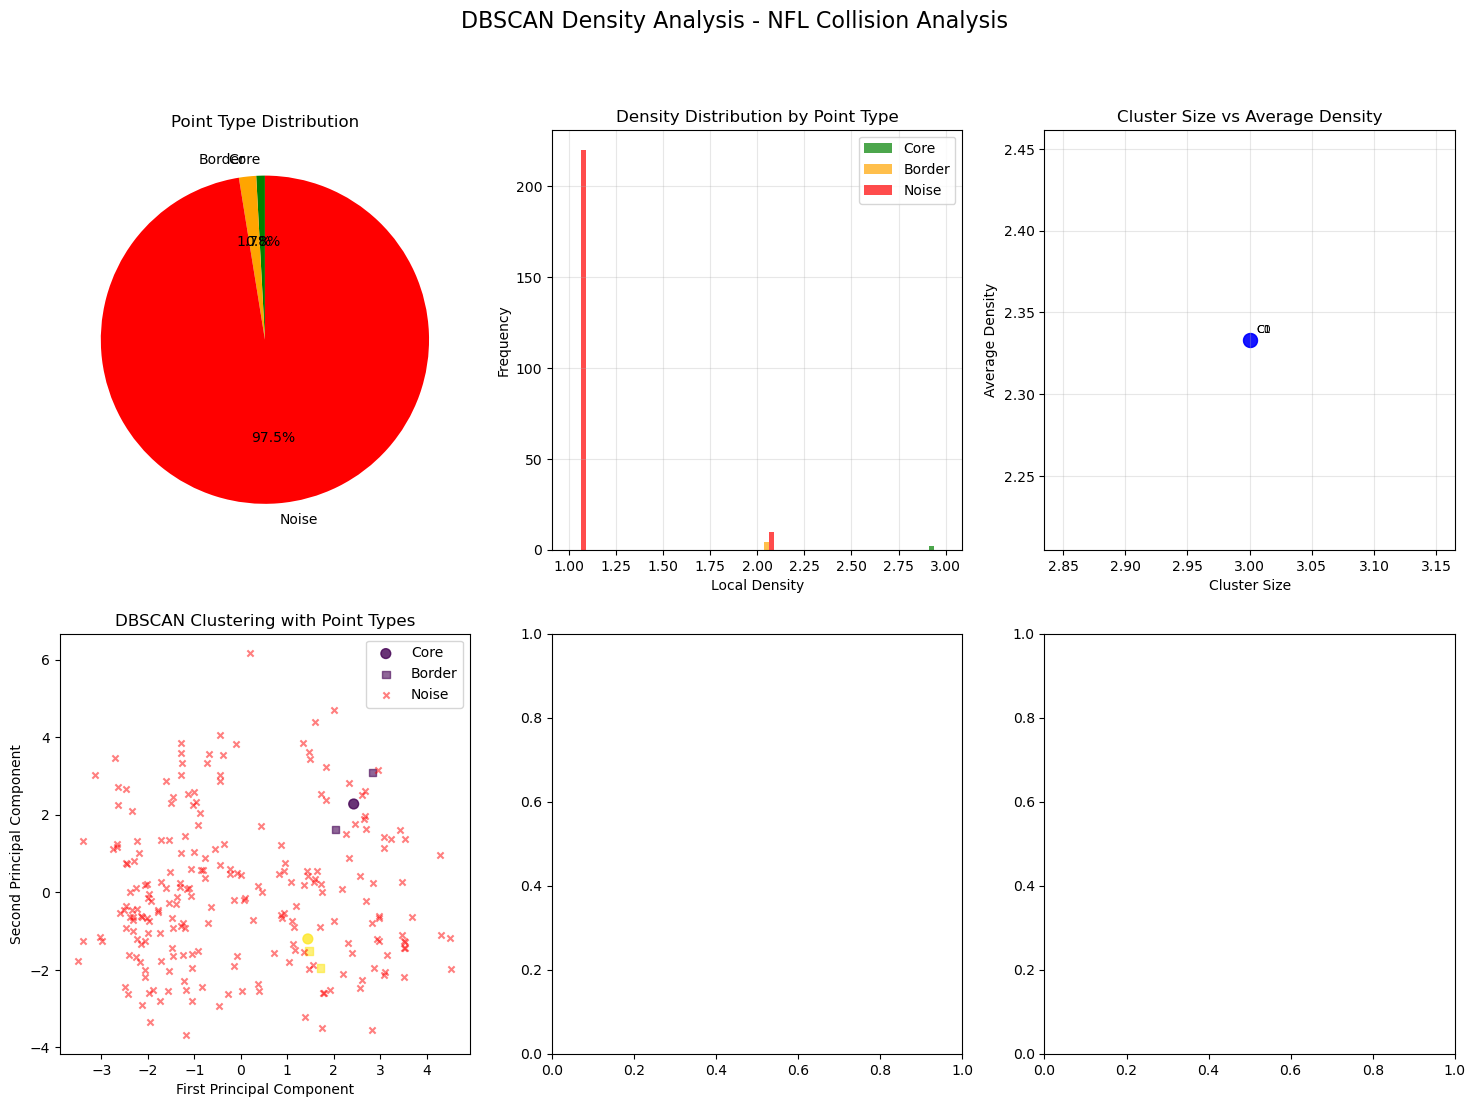

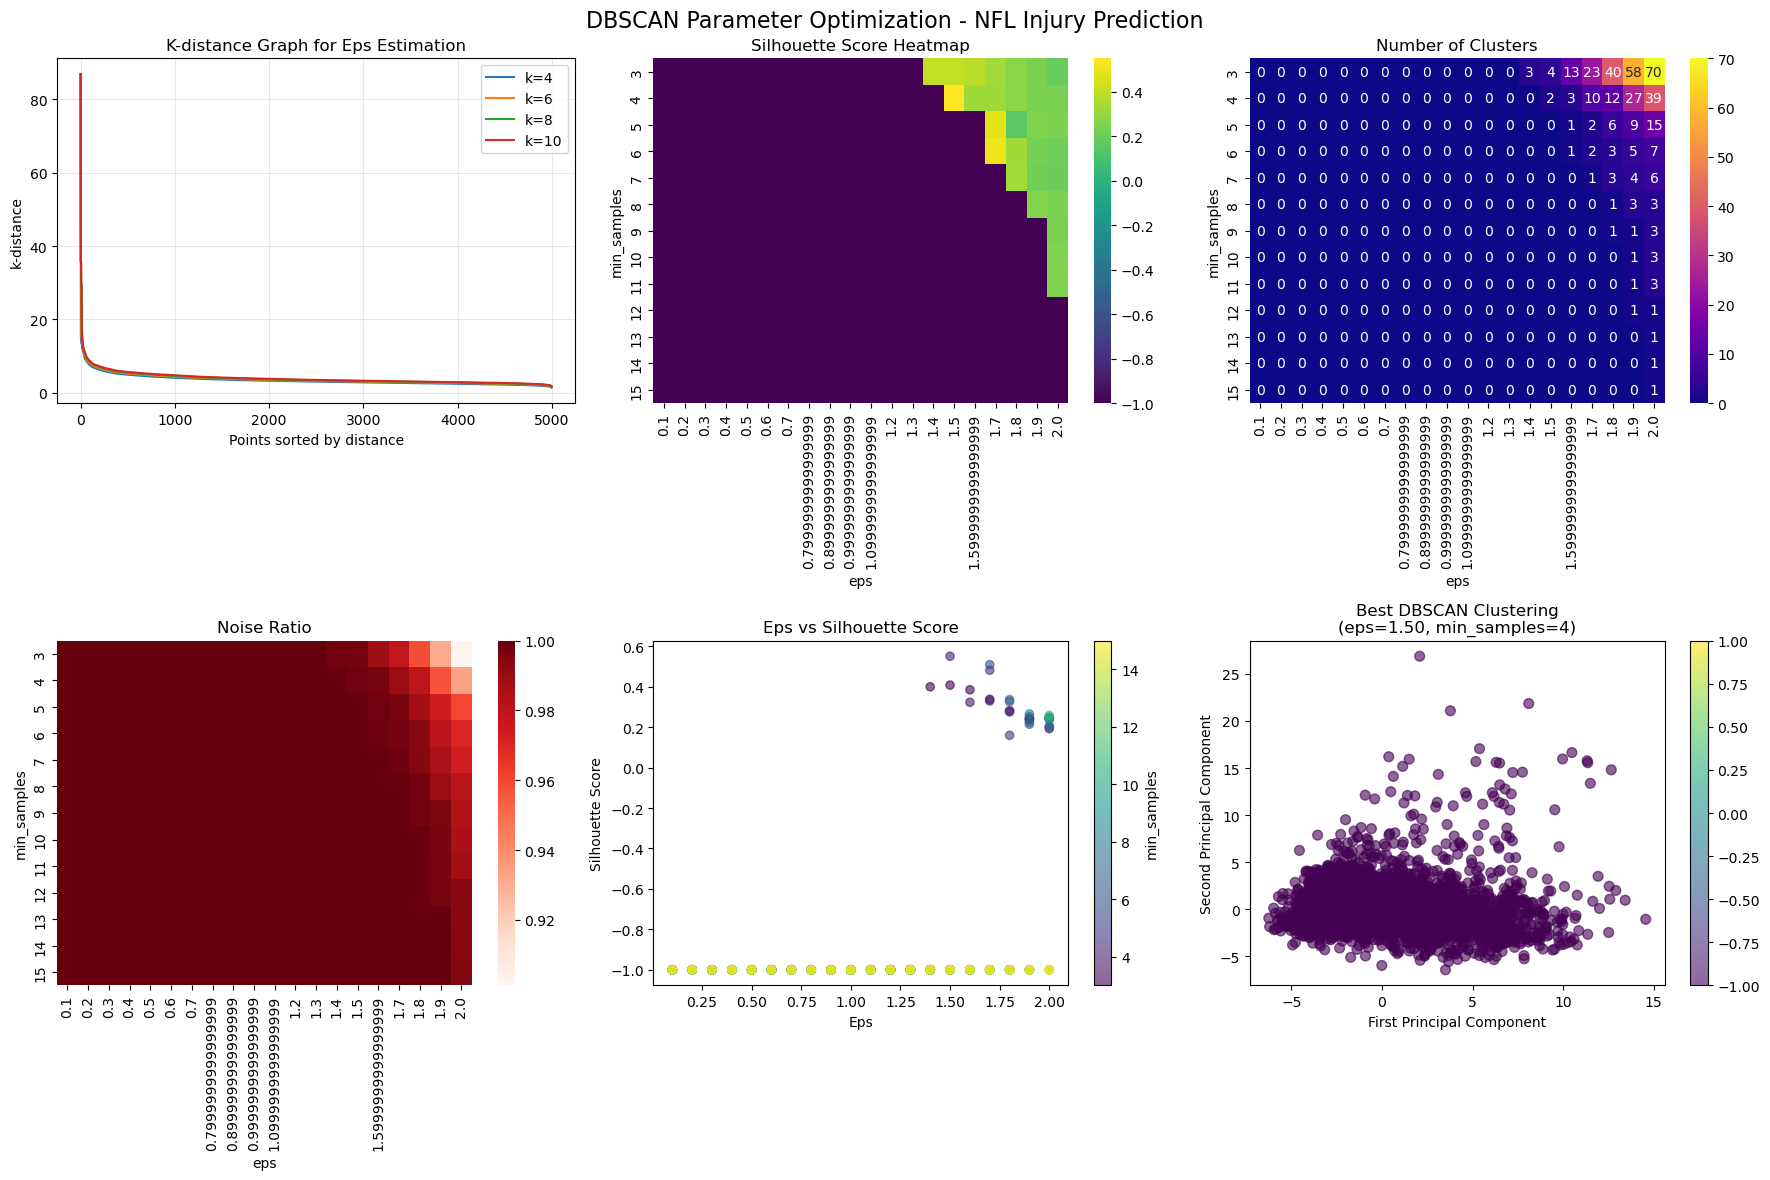

🎯 Optimal DBSCAN parameters:
   Eps: 1.500
   Min_samples: 4
   Best silhouette score: 0.551

🔍 EXPERIMENT 2: Density Analysis - NFL Injury Prediction
📊 Analyzing point densities and core points...
❌ Error in experiments for injury_prediction: Input z must be at least a (2, 2) shaped array, but has shape (0, 0)

🎯 ANALYZING DATASET: NFL Big Data Bowl

🔍 EXPERIMENT 1: DBSCAN Parameter Optimization - NFL Big Data Bowl
📏 Computing k-distance graph for eps estimation...
🔍 Grid search for optimal DBSCAN parameters...


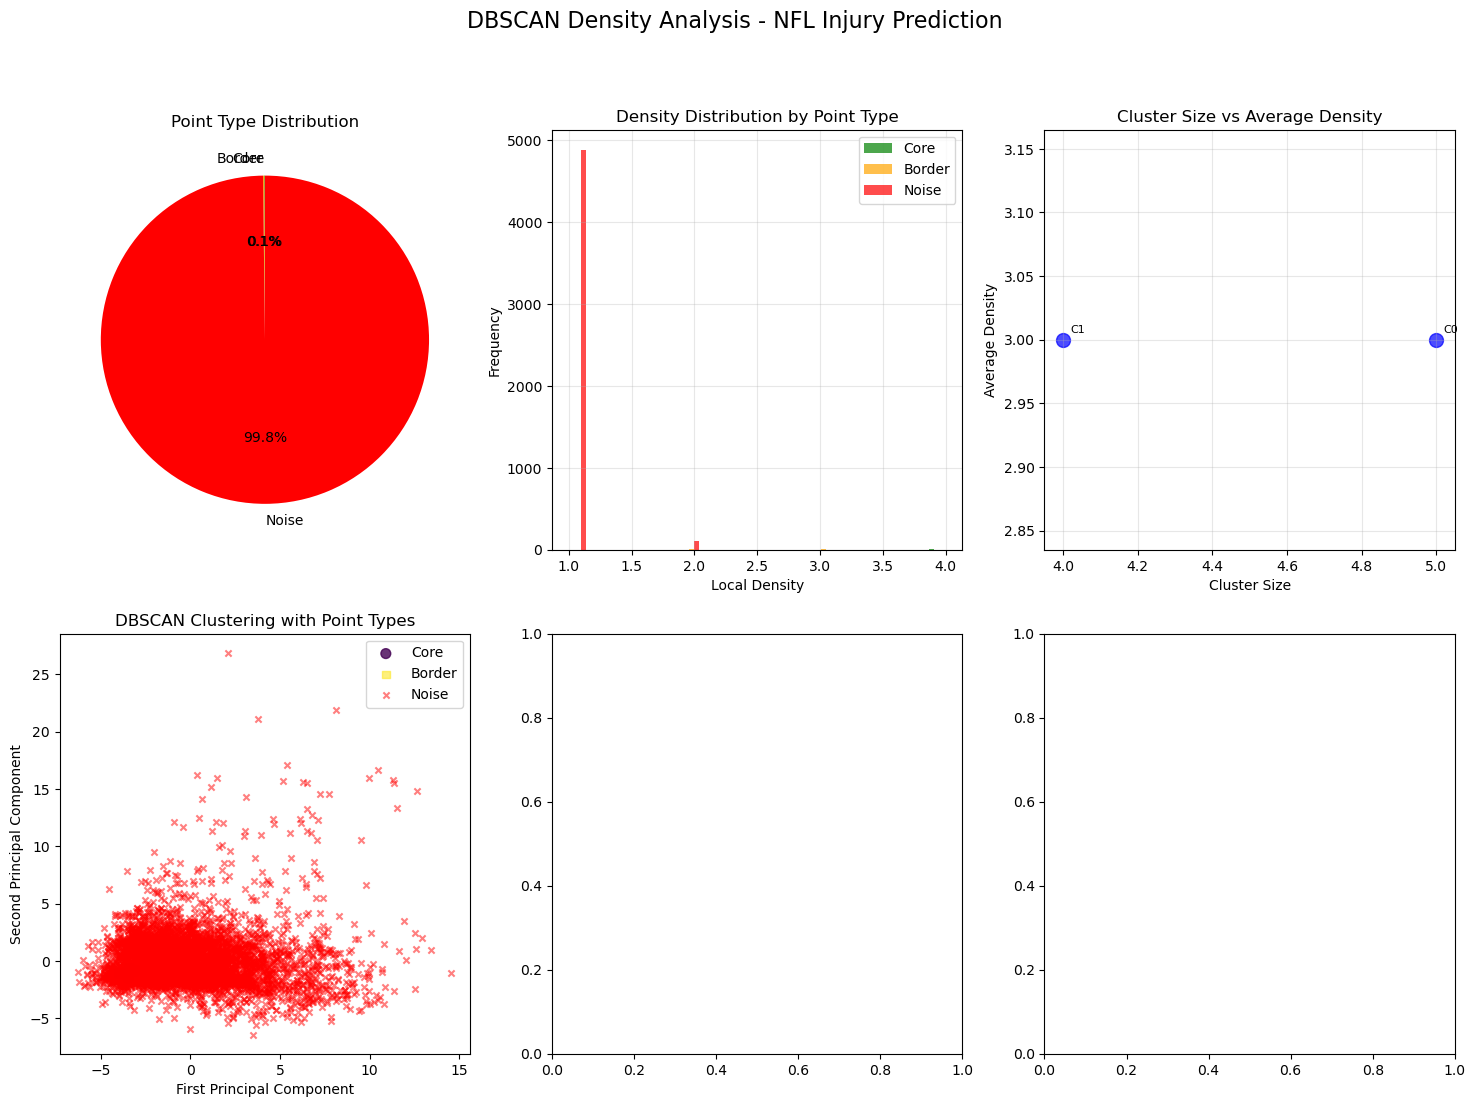

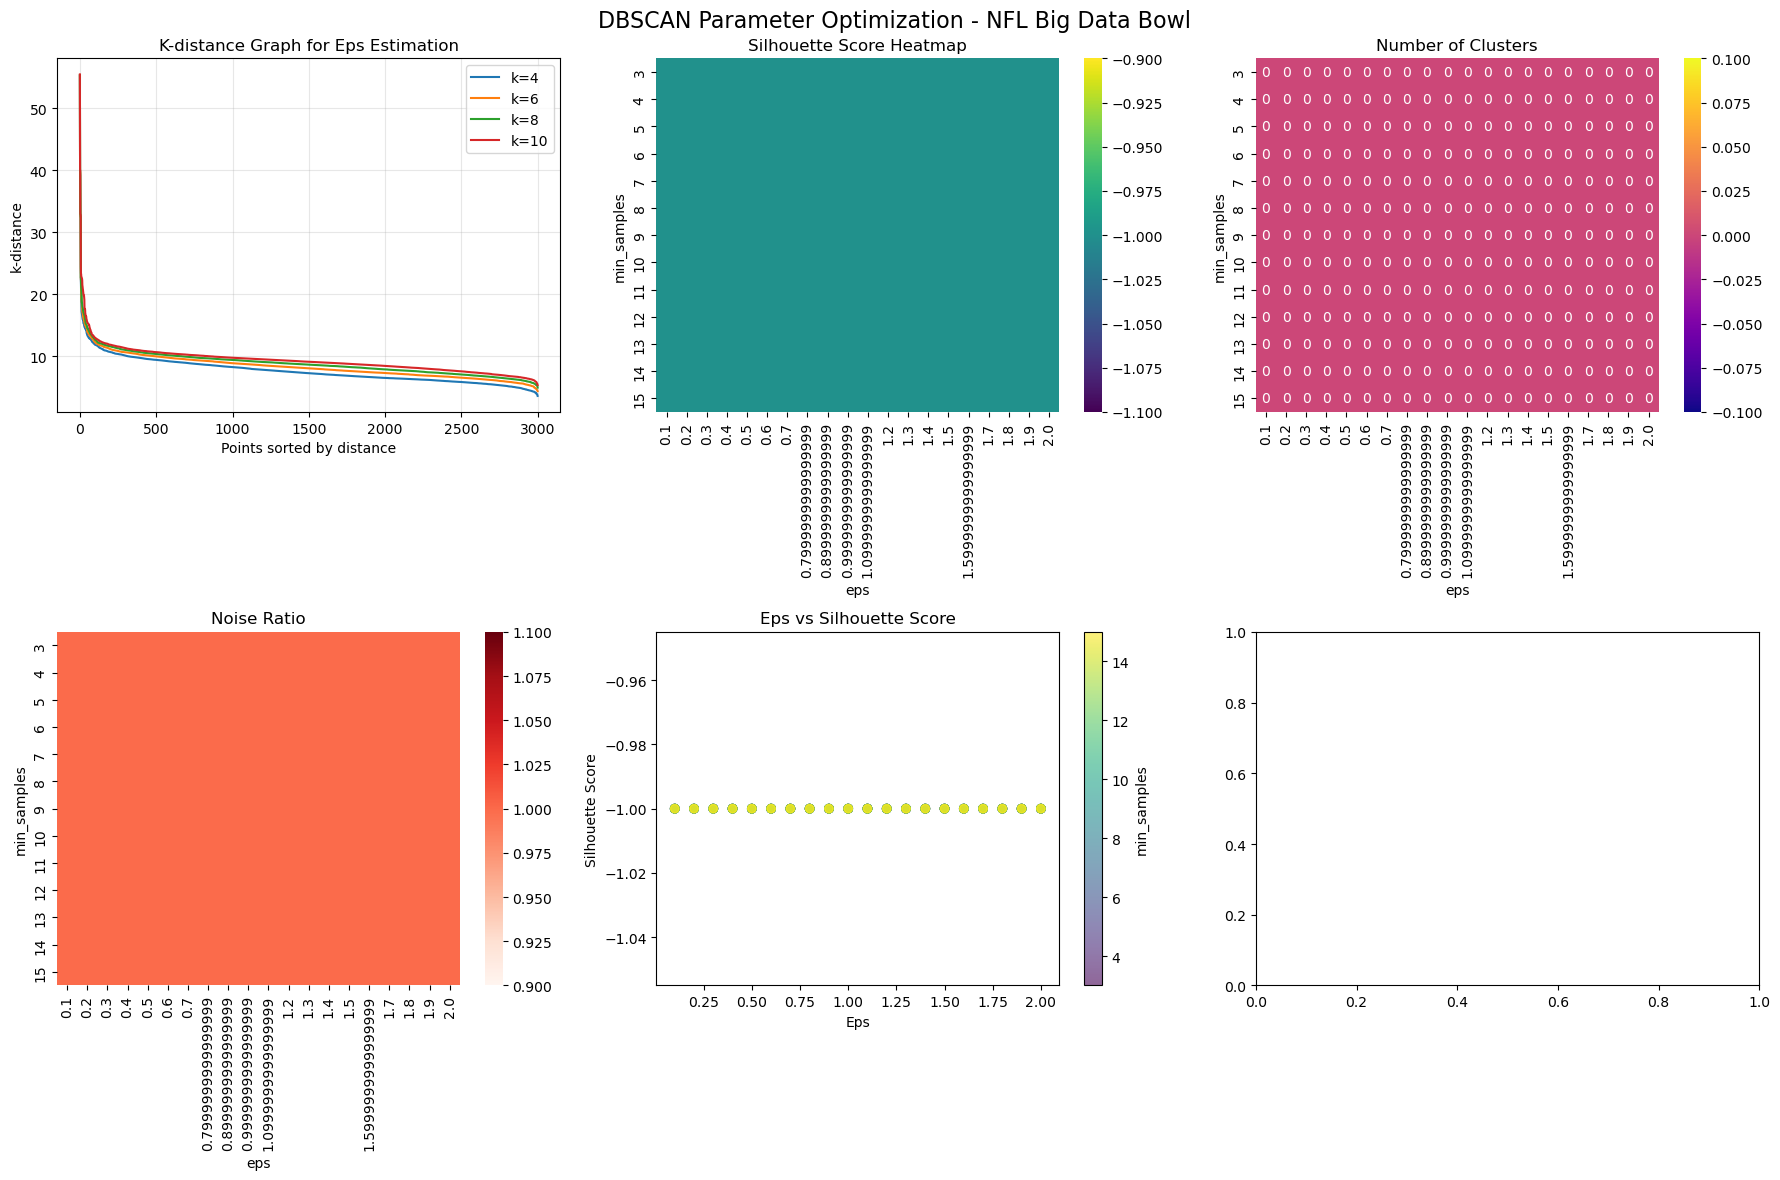

⚠️ No valid clustering found in parameter space

🔍 EXPERIMENT 2: Density Analysis - NFL Big Data Bowl
⚠️ Using default parameters: eps=0.5, min_samples=5
📊 Analyzing point densities and core points...
❌ Error in experiments for big_data_bowl: Input z must be at least a (2, 2) shaped array, but has shape (0, 0)

📊 COMPREHENSIVE EXPERIMENTAL SUMMARY

🎯 NFL Collision Analysis
------------------------------------------------------------
   DBSCAN Optimal Parameters:
     Eps: 1.600
     Min_samples: 3
   Density Analysis:
     Clusters: 2
     Core points: 2
     Noise points: 230

🎯 NFL Injury Prediction
------------------------------------------------------------
   DBSCAN Optimal Parameters:
     Eps: 1.500
     Min_samples: 4
   Density Analysis:
     Clusters: 2
     Core points: 3
     Noise points: 4991

🎯 NFL Big Data Bowl
------------------------------------------------------------
   Density Analysis:
     Clusters: 0
     Core points: 0
     Noise points: 3000

🎉 DBSCAN & HAC EX

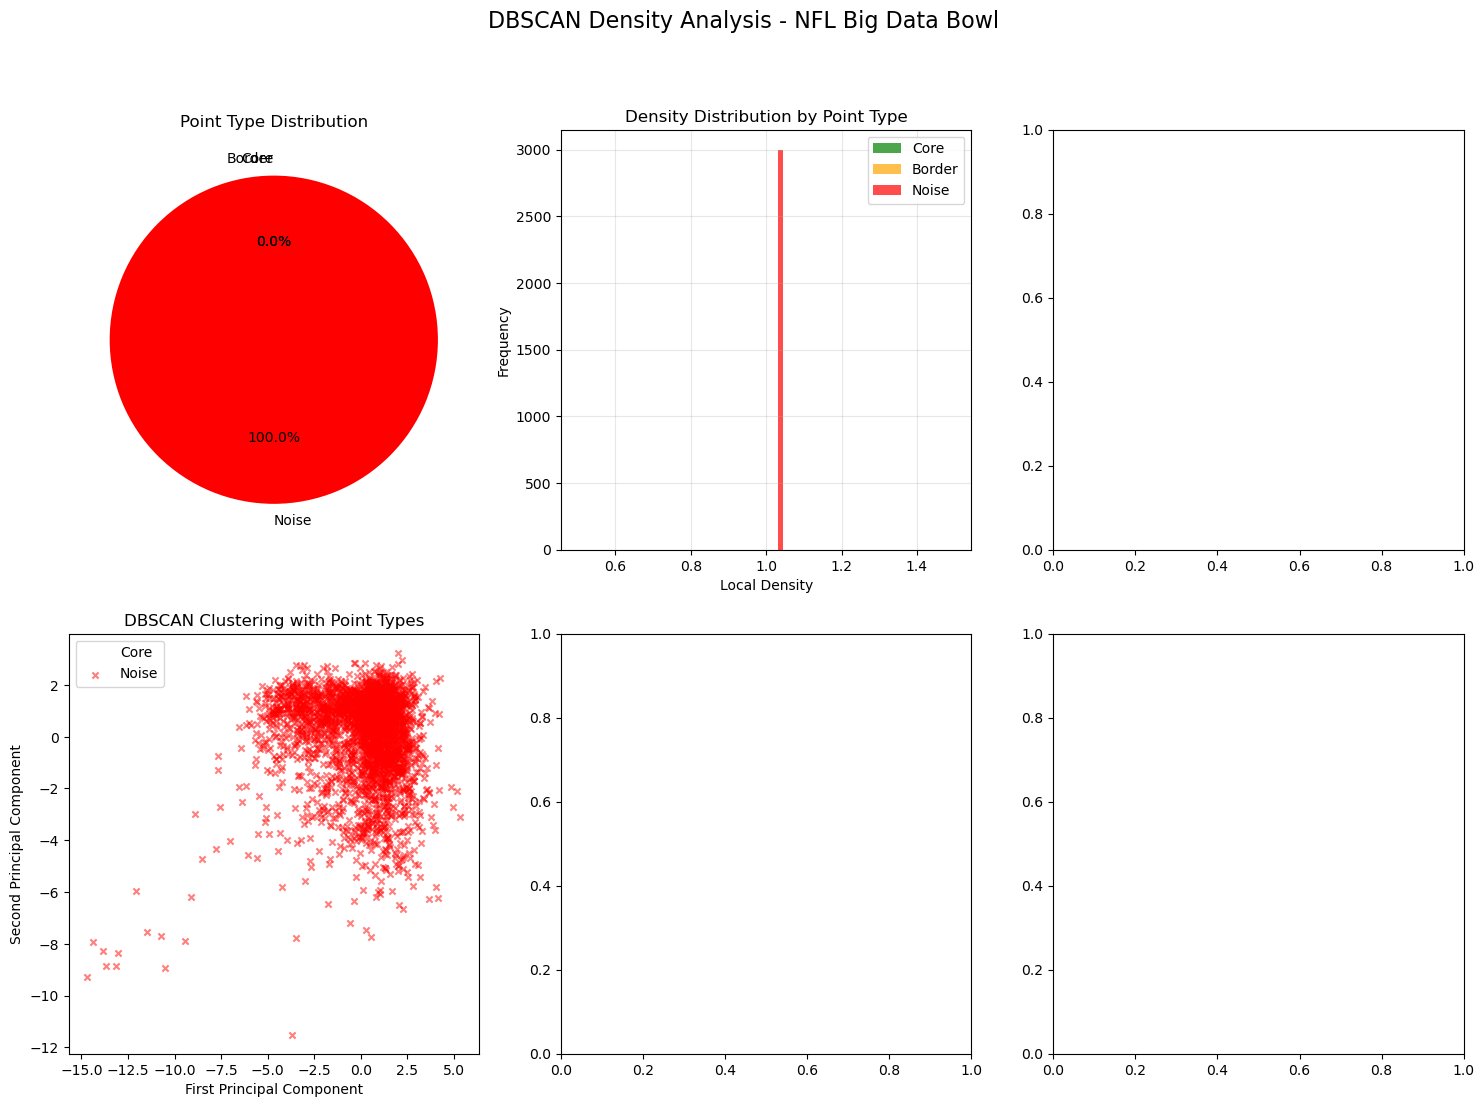

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

class DBSCANHACExperimentSuite:
    """
    Comprehensive DBSCAN and Hierarchical Agglomerative Clustering analysis suite
    Includes: Eps-MinPts optimization, Density analysis, Linkage methods comparison, Dendrograms
    """
    
    def __init__(self, eps_range=(0.1, 2.0), eps_steps=20, min_samples_range=(3, 20)):
        self.eps_range = eps_range
        self.eps_steps = eps_steps
        self.min_samples_range = min_samples_range
        self.results = {}
        self.linkage_methods = ['ward', 'complete', 'average', 'single']
        
    def load_datasets(self):
        """Load and prepare the three datasets from your notebook"""
        print("🔄 Loading datasets...")
        
        # Dataset 1: Small collision dataset (classification features)
        try:
            injury_df = pd.read_csv('scripts/punt_analytics/injury_collision_features.csv')
            normal_df = pd.read_csv('scripts/punt_analytics/normal_collision_features.csv')
            collision_df = pd.concat([injury_df, normal_df], ignore_index=True)
            
            # Remove non-numeric and identifier columns for clustering
            exclude_cols = ['season_year', 'gamekey', 'playid', 'injured_player', 
                          'partner_player', 'impact_type', 'player_activity', 
                          'partner_activity', 'friendly_fire', 'is_injury']
            
            collision_features = collision_df.select_dtypes(include=[np.number]).columns
            collision_features = [col for col in collision_features if col not in exclude_cols]
            
            self.datasets = {
                'collision': {
                    'data': collision_df[collision_features].dropna(),
                    'name': 'NFL Collision Analysis',
                    'description': 'Player collision biomechanics (308 samples)',
                    'target': collision_df['is_injury'].dropna() if 'is_injury' in collision_df.columns else None
                }
            }
            print(f"✅ Collision dataset: {self.datasets['collision']['data'].shape}")
            
        except Exception as e:
            print(f"⚠️ Could not load collision dataset: {e}")
        
        # Dataset 2: Large injury prediction dataset
        try:
            play_surface_df = pd.read_csv('datasets/nfl-playing-surface-analytics/processed_motion_features.csv')
            
            # Select relevant numeric features for clustering
            numeric_cols = play_surface_df.select_dtypes(include=[np.number]).columns
            exclude_cols = ['injury', 'PlayKey', 'PlayerDay', 'PlayerGame', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']
            feature_cols = [col for col in numeric_cols if col not in exclude_cols]
            
            # Sample for computational efficiency
            sample_size = min(5000, len(play_surface_df))
            sampled_data = play_surface_df.sample(n=sample_size, random_state=42)
            
            self.datasets['injury_prediction'] = {
                'data': sampled_data[feature_cols].dropna(),
                'name': 'NFL Injury Prediction',
                'description': f'Player movement patterns (sampled {sample_size} from 266k)',
                'target': sampled_data['injury'].dropna() if 'injury' in sampled_data.columns else None
            }
            print(f"✅ Injury prediction dataset: {self.datasets['injury_prediction']['data'].shape}")
            
        except Exception as e:
            print(f"⚠️ Could not load injury prediction dataset: {e}")
        
        # Dataset 3: Big Data Bowl regression dataset
        try:
            X_train = pd.read_csv('scripts/big_data_bowl/X_train.csv')
            y_train = pd.read_csv('scripts/big_data_bowl/y_train.csv')
            
            # Sample for efficiency
            sample_size = min(3000, len(X_train))
            sample_idx = np.random.choice(len(X_train), sample_size, replace=False)
            
            self.datasets['big_data_bowl'] = {
                'data': X_train.iloc[sample_idx].select_dtypes(include=[np.number]),
                'name': 'NFL Big Data Bowl',
                'description': f'Play outcome prediction features (sampled {sample_size})',
                'target': y_train.iloc[sample_idx].values.flatten() if len(y_train.columns) == 1 else None
            }
            print(f"✅ Big Data Bowl dataset: {self.datasets['big_data_bowl']['data'].shape}")
            
        except Exception as e:
            print(f"⚠️ Could not load Big Data Bowl dataset: {e}")
        
        return self.datasets

    def experiment_1_dbscan_parameter_optimization(self, dataset_key):
        """
        Experiment 1: DBSCAN Parameter Optimization
        Find optimal eps and min_samples using k-distance graph and grid search
        """
        print(f"\n🔍 EXPERIMENT 1: DBSCAN Parameter Optimization - {self.datasets[dataset_key]['name']}")
        print("="*80)
        
        data = self.datasets[dataset_key]['data']
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        
        # K-distance graph for eps estimation
        print("📏 Computing k-distance graph for eps estimation...")
        k_values = range(3, min(21, len(data_scaled)//10))
        k_distances = {}
        
        for k in k_values:
            nn = NearestNeighbors(n_neighbors=k)
            nn.fit(data_scaled)
            distances, _ = nn.kneighbors(data_scaled)
            k_distances[k] = np.sort(distances[:, k-1])[::-1]  # Sort in descending order
        
        # Grid search for optimal parameters
        print("🔍 Grid search for optimal DBSCAN parameters...")
        eps_values = np.linspace(self.eps_range[0], self.eps_range[1], self.eps_steps)
        min_samples_values = range(self.min_samples_range[0], self.min_samples_range[1]+1)
        
        grid_results = []
        best_score = -1
        best_params = None
        
        for eps in eps_values:
            for min_samples in min_samples_values:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(data_scaled)
                
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                n_noise = list(labels).count(-1)
                
                # Calculate metrics only if we have valid clusters
                if n_clusters > 1:
                    try:
                        # Remove noise points for silhouette calculation
                        non_noise_mask = labels != -1
                        if np.sum(non_noise_mask) > 1:
                            sil_score = silhouette_score(data_scaled[non_noise_mask], labels[non_noise_mask])
                        else:
                            sil_score = -1
                    except:
                        sil_score = -1
                else:
                    sil_score = -1
                
                grid_results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'noise_ratio': n_noise / len(labels),
                    'silhouette_score': sil_score
                })
                
                # Update best parameters
                if sil_score > best_score and n_clusters > 1:
                    best_score = sil_score
                    best_params = {'eps': eps, 'min_samples': min_samples}
        
        # Convert to DataFrame for analysis
        grid_df = pd.DataFrame(grid_results)
        
        # Store results
        self.results[dataset_key] = self.results.get(dataset_key, {})
        self.results[dataset_key]['dbscan_optimization'] = {
            'k_distances': k_distances,
            'grid_results': grid_df,
            'best_params': best_params,
            'best_score': best_score
        }
        
        # Visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle(f'DBSCAN Parameter Optimization - {self.datasets[dataset_key]["name"]}', fontsize=16)
        
        # K-distance graph
        for k in [4, 6, 8, 10]:
            if k in k_distances:
                axes[0, 0].plot(k_distances[k], label=f'k={k}')
        
        axes[0, 0].set_xlabel('Points sorted by distance')
        axes[0, 0].set_ylabel('k-distance')
        axes[0, 0].set_title('K-distance Graph for Eps Estimation')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Silhouette score heatmap
        pivot_sil = grid_df.pivot(index='min_samples', columns='eps', values='silhouette_score')
        sns.heatmap(pivot_sil, annot=False, cmap='viridis', ax=axes[0, 1])
        axes[0, 1].set_title('Silhouette Score Heatmap')
        
        # Number of clusters heatmap
        pivot_clusters = grid_df.pivot(index='min_samples', columns='eps', values='n_clusters')
        sns.heatmap(pivot_clusters, annot=True, fmt='d', cmap='plasma', ax=axes[0, 2])
        axes[0, 2].set_title('Number of Clusters')
        
        # Noise ratio heatmap
        pivot_noise = grid_df.pivot(index='min_samples', columns='eps', values='noise_ratio')
        sns.heatmap(pivot_noise, annot=False, cmap='Reds', ax=axes[1, 0])
        axes[1, 0].set_title('Noise Ratio')
        
        # Parameter relationships
        axes[1, 1].scatter(grid_df['eps'], grid_df['silhouette_score'], 
                          c=grid_df['min_samples'], cmap='viridis', alpha=0.6)
        axes[1, 1].set_xlabel('Eps')
        axes[1, 1].set_ylabel('Silhouette Score')
        axes[1, 1].set_title('Eps vs Silhouette Score')
        plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1], label='min_samples')
        
        # Best clustering result
        if best_params:
            best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
            best_labels = best_dbscan.fit_predict(data_scaled)
            
            if data_scaled.shape[1] > 2:
                pca = PCA(n_components=2, random_state=42)
                data_pca = pca.fit_transform(data_scaled)
            else:
                data_pca = data_scaled
            
            scatter = axes[1, 2].scatter(data_pca[:, 0], data_pca[:, 1], c=best_labels, 
                                       cmap='viridis', alpha=0.6, s=50)
            axes[1, 2].set_xlabel('First Principal Component')
            axes[1, 2].set_ylabel('Second Principal Component')
            axes[1, 2].set_title(f'Best DBSCAN Clustering\n(eps={best_params["eps"]:.2f}, min_samples={best_params["min_samples"]})')
            plt.colorbar(scatter, ax=axes[1, 2])
        
        plt.tight_layout()
        plt.show()
        
        if best_params:
            print(f"🎯 Optimal DBSCAN parameters:")
            print(f"   Eps: {best_params['eps']:.3f}")
            print(f"   Min_samples: {best_params['min_samples']}")
            print(f"   Best silhouette score: {best_score:.3f}")
        else:
            print("⚠️ No valid clustering found in parameter space")
        
        return best_params

    def experiment_2_density_analysis(self, dataset_key):
        """
        Experiment 2: Density Analysis and Core Points Investigation
        Analyze density distribution and core points characteristics
        """
        print(f"\n🔍 EXPERIMENT 2: Density Analysis - {self.datasets[dataset_key]['name']}")
        print("="*80)
        
        data = self.datasets[dataset_key]['data']
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        
        # Get optimal parameters from previous experiment
        best_params = self.results.get(dataset_key, {}).get('dbscan_optimization', {}).get('best_params')
        if not best_params:
            best_params = {'eps': 0.5, 'min_samples': 5}
            print(f"⚠️ Using default parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")
        
        # Fit DBSCAN with optimal parameters
        dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
        labels = dbscan.fit_predict(data_scaled)
        
        # Density analysis
        print("📊 Analyzing point densities and core points...")
        
        # Find core points
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        
        # Calculate local density for each point
        nn = NearestNeighbors(radius=best_params['eps'])
        nn.fit(data_scaled)
        neighbors = nn.radius_neighbors(data_scaled, return_distance=False)
        local_densities = [len(neighbor_list) for neighbor_list in neighbors]
        
        # Classify points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        n_core = len(dbscan.core_sample_indices_)
        n_border = len(data_scaled) - n_core - n_noise
        
        # Analyze cluster densities
        cluster_stats = {}
        unique_labels = set(labels)
        
        for label in unique_labels:
            if label == -1:  # Noise points
                continue
                
            cluster_mask = labels == label
            cluster_points = data_scaled[cluster_mask]
            cluster_core_mask = core_samples_mask[cluster_mask]
            cluster_densities = np.array(local_densities)[cluster_mask]
            
            cluster_stats[label] = {
                'size': np.sum(cluster_mask),
                'n_core_points': np.sum(cluster_core_mask),
                'avg_density': np.mean(cluster_densities),
                'std_density': np.std(cluster_densities),
                'min_density': np.min(cluster_densities),
                'max_density': np.max(cluster_densities)
            }
        
        # Store results
        self.results[dataset_key]['density_analysis'] = {
            'labels': labels,
            'core_samples_mask': core_samples_mask,
            'local_densities': local_densities,
            'cluster_stats': cluster_stats,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'n_core': n_core,
            'n_border': n_border
        }
        
        # Visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle(f'DBSCAN Density Analysis - {self.datasets[dataset_key]["name"]}', fontsize=16)
        
        # Point type distribution
        point_types = ['Core', 'Border', 'Noise']
        point_counts = [n_core, n_border, n_noise]
        colors = ['green', 'orange', 'red']
        
        axes[0, 0].pie(point_counts, labels=point_types, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[0, 0].set_title('Point Type Distribution')
        
        # Density distribution by point type
        core_densities = [local_densities[i] for i in range(len(local_densities)) if core_samples_mask[i]]
        border_densities = [local_densities[i] for i in range(len(local_densities)) 
                           if not core_samples_mask[i] and labels[i] != -1]
        noise_densities = [local_densities[i] for i in range(len(local_densities)) if labels[i] == -1]
        
        axes[0, 1].hist([core_densities, border_densities, noise_densities], 
                       bins=20, alpha=0.7, label=['Core', 'Border', 'Noise'], color=colors)
        axes[0, 1].set_xlabel('Local Density')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].set_title('Density Distribution by Point Type')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Cluster size vs average density
        if cluster_stats:
            cluster_sizes = [stats['size'] for stats in cluster_stats.values()]
            cluster_avg_densities = [stats['avg_density'] for stats in cluster_stats.values()]
            
            axes[0, 2].scatter(cluster_sizes, cluster_avg_densities, s=100, alpha=0.7, c='blue')
            axes[0, 2].set_xlabel('Cluster Size')
            axes[0, 2].set_ylabel('Average Density')
            axes[0, 2].set_title('Cluster Size vs Average Density')
            axes[0, 2].grid(True, alpha=0.3)
            
            # Add cluster labels
            for i, (size, density) in enumerate(zip(cluster_sizes, cluster_avg_densities)):
                axes[0, 2].annotate(f'C{i}', (size, density), xytext=(5, 5), 
                                   textcoords='offset points', fontsize=8)
        
        # Clustering visualization with point types
        if data_scaled.shape[1] > 2:
            pca = PCA(n_components=2, random_state=42)
            data_pca = pca.fit_transform(data_scaled)
        else:
            data_pca = data_scaled
        
        # Core points
        core_points = data_pca[core_samples_mask]
        axes[1, 0].scatter(core_points[:, 0], core_points[:, 1], c=labels[core_samples_mask], 
                          cmap='viridis', s=50, alpha=0.8, label='Core', marker='o')
        
        # Border points
        border_mask = (~core_samples_mask) & (labels != -1)
        if np.any(border_mask):
            border_points = data_pca[border_mask]
            axes[1, 0].scatter(border_points[:, 0], border_points[:, 1], c=labels[border_mask], 
                              cmap='viridis', s=30, alpha=0.6, label='Border', marker='s')
        
        # Noise points
        noise_mask = labels == -1
        if np.any(noise_mask):
            noise_points = data_pca[noise_mask]
            axes[1, 0].scatter(noise_points[:, 0], noise_points[:, 1], c='red', 
                              s=20, alpha=0.5, label='Noise', marker='x')
        
        axes[1, 0].set_xlabel('First Principal Component')
        axes[1, 0].set_ylabel('Second Principal Component')
        axes[1, 0].set_title('DBSCAN Clustering with Point Types')
        axes[1, 0].legend()
        
        # Density heatmap
        from scipy.stats import gaussian_kde
        if len(data_pca) > 10:
            kde = gaussian_kde(data_pca.T)
            x_min, x_max = data_pca[:, 0].min(), data_pca[:, 0].max()
            y_min, y_max = data_pca[:, 1].min(), data_pca[:, 1].max()
            
            xx, yy = np.mgrid[x_min:x_max:.1j, y_min:y_max:.1j]
            positions = np.vstack([xx.ravel(), yy.ravel()])
            density = np.reshape(kde(positions).T, xx.shape)
            
            im = axes[1, 1].contourf(xx, yy, density, cmap='Blues', alpha=0.6)
            axes[1, 1].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=30, alpha=0.8)
            plt.colorbar(im, ax=axes[1, 1])
            axes[1, 1].set_title('Data Density Heatmap')
        
        # Cluster statistics
        if cluster_stats:
            cluster_ids = list(cluster_stats.keys())
            avg_densities = [cluster_stats[cid]['avg_density'] for cid in cluster_ids]
            std_densities = [cluster_stats[cid]['std_density'] for cid in cluster_ids]
            
            axes[1, 2].bar(cluster_ids, avg_densities, yerr=std_densities, capsize=5,
                          alpha=0.7, color='skyblue', edgecolor='black')
            axes[1, 2].set_xlabel('Cluster ID')
            axes[1, 2].set_ylabel('Average Density ± Std')
            axes[1, 2].set_title('Cluster Density Statistics')
            axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(f"📊 Density Analysis Results:")
        print(f"   Total points: {len(data_scaled)}")
        print(f"   Core points: {n_core} ({n_core/len(data_scaled)*100:.1f}%)")
        print(f"   Border points: {n_border} ({n_border/len(data_scaled)*100:.1f}%)")
        print(f"   Noise points: {n_noise} ({n_noise/len(data_scaled)*100:.1f}%)")
        print(f"   Number of clusters: {n_clusters}")
        
        if cluster_stats:
            print(f"   Cluster density statistics:")
            for cid, stats in cluster_stats.items():
                print(f"     Cluster {cid}: {stats['size']} points, "
                      f"density = {stats['avg_density']:.1f}±{stats['std_density']:.1f}")

    def experiment_3_hierarchical_clustering_linkages(self, dataset_key):
        """
        Experiment 3: Hierarchical Agglomerative Clustering with Different Linkage Methods
        Compare ward, complete, average, and single linkage methods
        """
        print(f"\n🔍 EXPERIMENT 3: Hierarchical Clustering Linkages - {self.datasets[dataset_key]['name']}")
        print("="*80)
        
        data = self.datasets[dataset_key]['data']
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        
        # Sample data if too large for hierarchical clustering
        max_samples = 1000
        if len(data_scaled) > max_samples:
            print(f"📦 Sampling {max_samples} points for hierarchical clustering (original: {len(data_scaled)})")
            sample_idx = np.random.choice(len(data_scaled), max_samples, replace=False)
            data_scaled = data_scaled[sample_idx]
        
        # Test different numbers of clusters
        n_clusters_range = range(2, min(21, len(data_scaled)//10))
        linkage_results = {}
        
        print("🔗 Testing different linkage methods...")
        
        for linkage_method in self.linkage_methods:
            print(f"   Testing {linkage_method} linkage...")
            
            # Skip ward for non-euclidean distances
            if linkage_method == 'ward':
                metric = 'euclidean'
            else:
                metric = 'euclidean'  # Can be changed to other metrics for non-ward methods
            
            try:
                # Compute linkage matrix for dendrogram
                linkage_matrix = linkage(data_scaled, method=linkage_method, metric=metric)
                
                # Test different numbers of clusters
                silhouette_scores = []
                cluster_assignments = {}
                
                for n_clusters in n_clusters_range:
                    hac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
                    labels = hac.fit_predict(data_scaled)
                    
                    if len(set(labels)) > 1:
                        sil_score = silhouette_score(data_scaled, labels)
                        silhouette_scores.append(sil_score)
                        cluster_assignments[n_clusters] = labels
                    else:
                        silhouette_scores.append(-1)
                        cluster_assignments[n_clusters] = labels
                
                optimal_k = n_clusters_range[np.argmax(silhouette_scores)]
                best_score = max(silhouette_scores)
                
                linkage_results[linkage_method] = {
                    'linkage_matrix': linkage_matrix,
                    'silhouette_scores': silhouette_scores,
                    'optimal_k': optimal_k,
                    'best_score': best_score,
                    'cluster_assignments': cluster_assignments,
                    'n_clusters_range': list(n_clusters_range)
                }
                
            except Exception as e:
                print(f"     Error with {linkage_method}: {e}")
                continue
        
        # Store results
        self.results[dataset_key]['hac_linkages'] = linkage_results
        
        # Visualization
        n_methods = len(linkage_results)
        fig, axes = plt.subplots(3, n_methods, figsize=(5*n_methods, 15))
        if n_methods == 1:
            axes = axes.reshape(3, 1)
        
        fig.suptitle(f'Hierarchical Clustering Linkage Comparison - {self.datasets[dataset_key]["name"]}', 
                    fontsize=16)
        
        for i, (method, results) in enumerate(linkage_results.items()):
            # Dendrogram
            dendrogram(results['linkage_matrix'], ax=axes[0, i], truncate_mode='level', p=10)
            axes[0, i].set_title(f'{method.title()} Linkage Dendrogram')
            axes[0, i].set_xlabel('Sample Index or (Cluster Size)')
            axes[0, i].set_ylabel('Distance')
            
            # Silhouette scores
            axes[1, i].plot(results['n_clusters_range'], results['silhouette_scores'], 'bo-', linewidth=2)
            axes[1, i].axvline(x=results['optimal_k'], color='red', linestyle='--', alpha=0.7,
                              label=f"Optimal k={results['optimal_k']}")
            axes[1, i].set_xlabel('Number of Clusters')
            axes[1, i].set_ylabel('Silhouette Score')
            axes[1, i].set_title(f'{method.title()} - Silhouette Analysis')
            axes[1, i].grid(True, alpha=0.3)
            axes[1, i].legend()
            
            # Optimal clustering visualization
            optimal_labels = results['cluster_assignments'][results['optimal_k']]
            
            if data_scaled.shape[1] > 2:
                pca = PCA(n_components=2, random_state=42)
                data_pca = pca.fit_transform(data_scaled)
            else:
                data_pca = data_scaled
            
            scatter = axes[2, i].scatter(data_pca[:, 0], data_pca[:, 1], c=optimal_labels, 
                                       cmap='viridis', alpha=0.6, s=50)
            axes[2, i].set_xlabel('First Principal Component')
            axes[2, i].set_ylabel('Second Principal Component')
            axes[2, i].set_title(f'{method.title()} - Optimal Clustering (k={results["optimal_k"]})')
            plt.colorbar(scatter, ax=axes[2, i])
        
        plt.tight_layout()
        plt.show()
        
        # Performance comparison
        print(f"🔗 Linkage Method Performance Comparison:")
        print("-" * 60)
        print(f"{'Method':<12} {'Optimal k':<10} {'Best Silhouette':<15}")
        print("-" * 60)
        
        best_method = None
        best_overall_score = -1
        
        for method, results in linkage_results.items():
            print(f"{method.title():<12} {results['optimal_k']:<10} {results['best_score']:<15.3f}")
            if results['best_score'] > best_overall_score:
                best_overall_score = results['best_score']
                best_method = method
        
        print(f"\n🏆 Best linkage method: {best_method.title()} (score: {best_overall_score:.3f})")
        
        return linkage_results

    def experiment_4_dendrogram_analysis(self, dataset_key):
        """
        Experiment 4: Detailed Dendrogram Analysis
        In-depth analysis of hierarchical clustering structure and cut heights
        """
        print(f"\n🔍 EXPERIMENT 4: Dendrogram Analysis - {self.datasets[dataset_key]['name']}")
        print("="*80)
        
        data = self.datasets[dataset_key]['data']
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        
        # Sample data if necessary
        max_samples = 500  # Smaller sample for detailed dendrogram analysis
        if len(data_scaled) > max_samples:
            print(f"📦 Sampling {max_samples} points for detailed dendrogram analysis")
            sample_idx = np.random.choice(len(data_scaled), max_samples, replace=False)
            data_scaled = data_scaled[sample_idx]
        
        # Get best linkage method from previous experiment
        hac_results = self.results.get(dataset_key, {}).get('hac_linkages', {})
        if hac_results:
            best_method = max(hac_results.keys(), key=lambda x: hac_results[x]['best_score'])
        else:
            best_method = 'ward'
        
        print(f"🔗 Using {best_method} linkage for detailed analysis...")
        
        # Compute linkage matrix
        linkage_matrix = linkage(data_scaled, method=best_method)
        
        # Analyze different cut heights
        max_distance = linkage_matrix[:, 2].max()
        min_distance = linkage_matrix[:, 2].min()
        
        cut_heights = np.linspace(min_distance, max_distance * 0.8, 10)
        cut_analysis = []
        
        for height in cut_heights:
            labels = fcluster(linkage_matrix, height, criterion='distance')
            n_clusters = len(set(labels))
            
            if n_clusters > 1:
                sil_score = silhouette_score(data_scaled, labels)
            else:
                sil_score = -1
            
            cut_analysis.append({
                'height': height,
                'n_clusters': n_clusters,
                'silhouette_score': sil_score
            })
        
        cut_df = pd.DataFrame(cut_analysis)
        
        # Find optimal cut height
        valid_cuts = cut_df[cut_df['silhouette_score'] > -1]
        if len(valid_cuts) > 0:
            optimal_cut = valid_cuts.loc[valid_cuts['silhouette_score'].idxmax()]
        else:
            optimal_cut = cut_df.iloc[len(cut_df)//2]  # Middle cut
        
        # Distance matrix analysis
        distance_matrix = squareform(pdist(data_scaled))
        
        # Store results
        self.results[dataset_key]['dendrogram_analysis'] = {
            'linkage_matrix': linkage_matrix,
            'cut_analysis': cut_df,
            'optimal_cut': optimal_cut,
            'distance_matrix': distance_matrix,
            'best_linkage_method': best_method
        }
        
        # Comprehensive visualization
        fig = plt.figure(figsize=(20, 15))
        gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
        
        # Large dendrogram with cut line
        ax1 = fig.add_subplot(gs[0, :])
        dend = dendrogram(linkage_matrix, ax=ax1, color_threshold=optimal_cut['height'])
        ax1.axhline(y=optimal_cut['height'], color='red', linestyle='--', linewidth=2,
                   label=f"Optimal cut (k={optimal_cut['n_clusters']})")
        ax1.set_title(f'Complete Dendrogram - {best_method.title()} Linkage', fontsize=14)
        ax1.set_xlabel('Sample Index or (Cluster Size)')
        ax1.set_ylabel('Distance')
        ax1.legend()
        
        # Cut height analysis
        ax2 = fig.add_subplot(gs[1, 0])
        ax2.plot(cut_df['height'], cut_df['n_clusters'], 'bo-', linewidth=2)
        ax2.axvline(x=optimal_cut['height'], color='red', linestyle='--', alpha=0.7)
        ax2.set_xlabel('Cut Height')
        ax2.set_ylabel('Number of Clusters')
        ax2.set_title('Cut Height vs Number of Clusters')
        ax2.grid(True, alpha=0.3)
        
        # Silhouette vs cut height
        ax3 = fig.add_subplot(gs[1, 1])
        valid_mask = cut_df['silhouette_score'] > -1
        ax3.plot(cut_df.loc[valid_mask, 'height'], cut_df.loc[valid_mask, 'silhouette_score'], 
                'go-', linewidth=2)
        ax3.axvline(x=optimal_cut['height'], color='red', linestyle='--', alpha=0.7)
        ax3.set_xlabel('Cut Height')
        ax3.set_ylabel('Silhouette Score')
        ax3.set_title('Cut Height vs Silhouette Score')
        ax3.grid(True, alpha=0.3)
        
        # Distance matrix heatmap
        ax4 = fig.add_subplot(gs[1, 2])
        # Sample for visualization if too large
        if len(distance_matrix) > 100:
            sample_idx = np.random.choice(len(distance_matrix), 100, replace=False)
            sample_matrix = distance_matrix[np.ix_(sample_idx, sample_idx)]
        else:
            sample_matrix = distance_matrix
        
        im = ax4.imshow(sample_matrix, cmap='viridis', aspect='auto')
        ax4.set_title('Distance Matrix Heatmap')
        ax4.set_xlabel('Sample Index')
        ax4.set_ylabel('Sample Index')
        plt.colorbar(im, ax=ax4)
        
        # Optimal clustering result
        ax5 = fig.add_subplot(gs[1, 3])
        optimal_labels = fcluster(linkage_matrix, optimal_cut['height'], criterion='distance')
        
        if data_scaled.shape[1] > 2:
            pca = PCA(n_components=2, random_state=42)
            data_pca = pca.fit_transform(data_scaled)
        else:
            data_pca = data_scaled
        
        scatter = ax5.scatter(data_pca[:, 0], data_pca[:, 1], c=optimal_labels, 
                            cmap='viridis', alpha=0.6, s=50)
        ax5.set_xlabel('First Principal Component')
        ax5.set_ylabel('Second Principal Component')
        ax5.set_title(f'Optimal Clustering\n(k={optimal_cut["n_clusters"]}, score={optimal_cut["silhouette_score"]:.3f})')
        plt.colorbar(scatter, ax=ax5)
        
        # Linkage distance distribution
        ax6 = fig.add_subplot(gs[2, 0])
        ax6.hist(linkage_matrix[:, 2], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax6.axvline(x=optimal_cut['height'], color='red', linestyle='--', linewidth=2)
        ax6.set_xlabel('Linkage Distance')
        ax6.set_ylabel('Frequency')
        ax6.set_title('Distribution of Linkage Distances')
        ax6.grid(True, alpha=0.3)
        
        # Cluster size distribution at optimal cut
        ax7 = fig.add_subplot(gs[2, 1])
        unique, counts = np.unique(optimal_labels, return_counts=True)
        ax7.bar(unique, counts, alpha=0.7, color='lightcoral', edgecolor='black')
        ax7.set_xlabel('Cluster ID')
        ax7.set_ylabel('Cluster Size')
        ax7.set_title('Cluster Size Distribution')
        ax7.grid(True, alpha=0.3)
        
        # Merge sequence analysis
        ax8 = fig.add_subplot(gs[2, 2:])
        merge_distances = linkage_matrix[:, 2]
        ax8.plot(range(len(merge_distances)), merge_distances, 'b-', linewidth=2)
        ax8.set_xlabel('Merge Step')
        ax8.set_ylabel('Merge Distance')
        ax8.set_title('Hierarchical Merge Sequence')
        ax8.grid(True, alpha=0.3)
        
        plt.suptitle(f'Comprehensive Dendrogram Analysis - {self.datasets[dataset_key]["name"]}', 
                    fontsize=16)
        plt.show()
        
        print(f"🌳 Dendrogram Analysis Results:")
        print(f"   Best linkage method: {best_method}")
        print(f"   Optimal cut height: {optimal_cut['height']:.3f}")
        print(f"   Resulting clusters: {optimal_cut['n_clusters']}")
        print(f"   Silhouette score: {optimal_cut['silhouette_score']:.3f}")
        print(f"   Distance range: {min_distance:.3f} - {max_distance:.3f}")
        
        return optimal_cut

    def experiment_5_cross_algorithm_comparison(self, dataset_key):
        """
        Experiment 5: DBSCAN vs HAC Comparison
        Compare DBSCAN and Hierarchical clustering performance
        """
        print(f"\n🔍 EXPERIMENT 5: DBSCAN vs HAC Comparison - {self.datasets[dataset_key]['name']}")
        print("="*80)
        
        data = self.datasets[dataset_key]['data']
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        
        # Sample for comparison if necessary
        max_samples = 1000
        if len(data_scaled) > max_samples:
            sample_idx = np.random.choice(len(data_scaled), max_samples, replace=False)
            data_scaled = data_scaled[sample_idx]
        
        comparison_results = {}
        
        # DBSCAN results
        dbscan_params = self.results.get(dataset_key, {}).get('dbscan_optimization', {}).get('best_params')
        if dbscan_params:
            dbscan = DBSCAN(eps=dbscan_params['eps'], min_samples=dbscan_params['min_samples'])
            dbscan_labels = dbscan.fit_predict(data_scaled)
            
            dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
            dbscan_n_noise = list(dbscan_labels).count(-1)
            
            # Calculate metrics excluding noise points
            non_noise_mask = dbscan_labels != -1
            if dbscan_n_clusters > 1 and np.sum(non_noise_mask) > 1:
                dbscan_silhouette = silhouette_score(data_scaled[non_noise_mask], 
                                                   dbscan_labels[non_noise_mask])
            else:
                dbscan_silhouette = -1
            
            comparison_results['DBSCAN'] = {
                'labels': dbscan_labels,
                'n_clusters': dbscan_n_clusters,
                'n_noise': dbscan_n_noise,
                'silhouette_score': dbscan_silhouette,
                'algorithm': 'Density-based',
                'params': dbscan_params
            }
        
        # HAC results
        hac_results = self.results.get(dataset_key, {}).get('hac_linkages', {})
        if hac_results:
            best_linkage = max(hac_results.keys(), key=lambda x: hac_results[x]['best_score'])
            best_hac = hac_results[best_linkage]
            
            hac = AgglomerativeClustering(n_clusters=best_hac['optimal_k'], linkage=best_linkage)
            hac_labels = hac.fit_predict(data_scaled)
            
            hac_silhouette = silhouette_score(data_scaled, hac_labels)
            
            comparison_results['HAC'] = {
                'labels': hac_labels,
                'n_clusters': best_hac['optimal_k'],
                'n_noise': 0,  # HAC doesn't have noise points
                'silhouette_score': hac_silhouette,
                'algorithm': 'Hierarchical',
                'params': {'linkage': best_linkage, 'n_clusters': best_hac['optimal_k']}
            }
        
        # Calculate additional comparison metrics if we have ground truth
        if 'target' in self.datasets[dataset_key] and self.datasets[dataset_key]['target'] is not None:
            target = self.datasets[dataset_key]['target']
            if len(target) == len(data_scaled):
                for alg_name, results in comparison_results.items():
                    if results['n_clusters'] > 1:
                        results['ari_score'] = adjusted_rand_score(target, results['labels'])
                        results['nmi_score'] = normalized_mutual_info_score(target, results['labels'])
        
        # Store results
        self.results[dataset_key]['algorithm_comparison'] = comparison_results
        
        # Visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle(f'DBSCAN vs HAC Comparison - {self.datasets[dataset_key]["name"]}', fontsize=16)
        
        # Performance metrics comparison
        algorithms = list(comparison_results.keys())
        silhouette_scores = [comparison_results[alg]['silhouette_score'] for alg in algorithms]
        n_clusters = [comparison_results[alg]['n_clusters'] for alg in algorithms]
        n_noise = [comparison_results[alg]['n_noise'] for alg in algorithms]
        
        axes[0, 0].bar(algorithms, silhouette_scores, color=['blue', 'green'], alpha=0.7, edgecolor='black')
        axes[0, 0].set_ylabel('Silhouette Score')
        axes[0, 0].set_title('Silhouette Score Comparison')
        axes[0, 0].grid(True, alpha=0.3)
        
        axes[0, 1].bar(algorithms, n_clusters, color=['blue', 'green'], alpha=0.7, edgecolor='black')
        axes[0, 1].set_ylabel('Number of Clusters')
        axes[0, 1].set_title('Number of Clusters')
        axes[0, 1].grid(True, alpha=0.3)
        
        axes[0, 2].bar(algorithms, n_noise, color=['blue', 'green'], alpha=0.7, edgecolor='black')
        axes[0, 2].set_ylabel('Number of Noise Points')
        axes[0, 2].set_title('Noise Points (DBSCAN only)')
        axes[0, 2].grid(True, alpha=0.3)
        
        # Clustering visualizations
        if data_scaled.shape[1] > 2:
            pca = PCA(n_components=2, random_state=42)
            data_pca = pca.fit_transform(data_scaled)
        else:
            data_pca = data_scaled
        
        for i, (alg_name, results) in enumerate(comparison_results.items()):
            ax = axes[1, i]
            
            labels = results['labels']
            scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, 
                               cmap='viridis', alpha=0.6, s=50)
            
            ax.set_xlabel('First Principal Component')
            ax.set_ylabel('Second Principal Component')
            ax.set_title(f'{alg_name} Clustering\n(k={results["n_clusters"]}, score={results["silhouette_score"]:.3f})')
            plt.colorbar(scatter, ax=ax)
        
        # Algorithm characteristics comparison
        ax = axes[1, 2]
        characteristics = {
            'DBSCAN': ['Density-based', 'Handles noise', 'No predefined k', 'Finds arbitrary shapes'],
            'HAC': ['Hierarchy-based', 'No noise handling', 'Needs predefined k', 'Tends toward spherical']
        }
        
        y_pos = 0
        for alg, chars in characteristics.items():
            ax.text(0.1, y_pos, f'{alg}:', fontweight='bold', fontsize=12)
            for j, char in enumerate(chars):
                ax.text(0.15, y_pos - 0.1 * (j + 1), f'• {char}', fontsize=10)
            y_pos -= 0.6
        
        ax.set_xlim(0, 1)
        ax.set_ylim(-1.5, 0.2)
        ax.set_title('Algorithm Characteristics')
        ax.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Detailed comparison table
        print(f"📊 DETAILED ALGORITHM COMPARISON")
        print("-" * 80)
        print(f"{'Metric':<20} {'DBSCAN':<15} {'HAC':<15}")
        print("-" * 80)
        
        metrics = ['n_clusters', 'silhouette_score', 'n_noise']
        for metric in metrics:
            dbscan_val = comparison_results.get('DBSCAN', {}).get(metric, 'N/A')
            hac_val = comparison_results.get('HAC', {}).get(metric, 'N/A')
            
            if isinstance(dbscan_val, float):
                dbscan_str = f"{dbscan_val:.3f}"
            else:
                dbscan_str = str(dbscan_val)
                
            if isinstance(hac_val, float):
                hac_str = f"{hac_val:.3f}"
            else:
                hac_str = str(hac_val)
            
            print(f"{metric:<20} {dbscan_str:<15} {hac_str:<15}")
        
        # Add ARI and NMI if available
        if 'ari_score' in comparison_results.get('DBSCAN', {}):
            print(f"{'ari_score':<20} {comparison_results['DBSCAN']['ari_score']:<15.3f} {comparison_results['HAC']['ari_score']:<15.3f}")
            print(f"{'nmi_score':<20} {comparison_results['DBSCAN']['nmi_score']:<15.3f} {comparison_results['HAC']['nmi_score']:<15.3f}")
        
        # Determine winner
        if len(comparison_results) == 2:
            dbscan_score = comparison_results['DBSCAN']['silhouette_score']
            hac_score = comparison_results['HAC']['silhouette_score']
            
            if dbscan_score > hac_score:
                winner = 'DBSCAN'
                margin = dbscan_score - hac_score
            else:
                winner = 'HAC'
                margin = hac_score - dbscan_score
            
            print(f"\n🏆 Winner: {winner} (margin: {margin:.3f})")
        
        return comparison_results

    def run_all_experiments(self):
        """Run the complete experimental suite for DBSCAN and HAC"""
        print("🚀 STARTING COMPREHENSIVE DBSCAN & HAC EXPERIMENTAL SUITE")
        print("="*90)
        
        # Load datasets
        datasets = self.load_datasets()
        
        if not datasets:
            print("❌ No datasets loaded. Please check file paths.")
            return
        
        # Run experiments for each dataset
        for dataset_key in datasets.keys():
            print(f"\n🎯 ANALYZING DATASET: {datasets[dataset_key]['name']}")
            print("="*90)
            
            try:
                # Run all experiments
                self.experiment_1_dbscan_parameter_optimization(dataset_key)
                self.experiment_2_density_analysis(dataset_key)
                self.experiment_3_hierarchical_clustering_linkages(dataset_key)
                self.experiment_4_dendrogram_analysis(dataset_key)
                self.experiment_5_cross_algorithm_comparison(dataset_key)
                
            except Exception as e:
                print(f"❌ Error in experiments for {dataset_key}: {e}")
                continue
        
        # Final summary
        self.generate_final_summary()

    def generate_final_summary(self):
        """Generate comprehensive summary of all experiments"""
        print(f"\n📊 COMPREHENSIVE EXPERIMENTAL SUMMARY")
        print("="*90)
        
        for dataset_key, dataset_results in self.results.items():
            dataset_name = self.datasets[dataset_key]['name']
            print(f"\n🎯 {dataset_name}")
            print("-" * 60)
            
            # DBSCAN results
            if 'dbscan_optimization' in dataset_results:
                dbscan_params = dataset_results['dbscan_optimization']['best_params']
                if dbscan_params:
                    print(f"   DBSCAN Optimal Parameters:")
                    print(f"     Eps: {dbscan_params['eps']:.3f}")
                    print(f"     Min_samples: {dbscan_params['min_samples']}")
            
            # Density analysis
            if 'density_analysis' in dataset_results:
                density_info = dataset_results['density_analysis']
                print(f"   Density Analysis:")
                print(f"     Clusters: {density_info['n_clusters']}")
                print(f"     Core points: {density_info['n_core']}")
                print(f"     Noise points: {density_info['n_noise']}")
            
            # HAC results
            if 'hac_linkages' in dataset_results:
                hac_results = dataset_results['hac_linkages']
                best_linkage = max(hac_results.keys(), key=lambda x: hac_results[x]['best_score'])
                best_score = hac_results[best_linkage]['best_score']
                optimal_k = hac_results[best_linkage]['optimal_k']
                print(f"   HAC Best Results:")
                print(f"     Linkage method: {best_linkage}")
                print(f"     Optimal k: {optimal_k}")
                print(f"     Silhouette score: {best_score:.3f}")
            
            # Algorithm comparison
            if 'algorithm_comparison' in dataset_results:
                comparison = dataset_results['algorithm_comparison']
                print(f"   Algorithm Winner:")
                if 'DBSCAN' in comparison and 'HAC' in comparison:
                    dbscan_score = comparison['DBSCAN']['silhouette_score']
                    hac_score = comparison['HAC']['silhouette_score']
                    winner = 'DBSCAN' if dbscan_score > hac_score else 'HAC'
                    print(f"     {winner} (DBSCAN: {dbscan_score:.3f}, HAC: {hac_score:.3f})")
        
        print(f"\n🎉 DBSCAN & HAC EXPERIMENTAL SUITE COMPLETE!")
        print("="*90)


# Usage Example
if __name__ == "__main__":
    # Create experiment suite
    experiment_suite = DBSCANHACExperimentSuite(
        eps_range=(0.1, 2.0),
        eps_steps=20,
        min_samples_range=(3, 15)
    )
    
    # Run all experiments
    experiment_suite.run_all_experiments()
    
    # Access results programmatically
    print("\n🔍 Results stored in experiment_suite.results for further analysis")
    
    # Example: Access specific results
    #dbscan_params = experiment_suite.results['collision']['dbscan_optimization']['best_params']
    #hac_results = experiment_suite.results['collision']['hac_linkages']